In [2]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00


In [3]:
!pip install tensorflow
!pip install keras

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


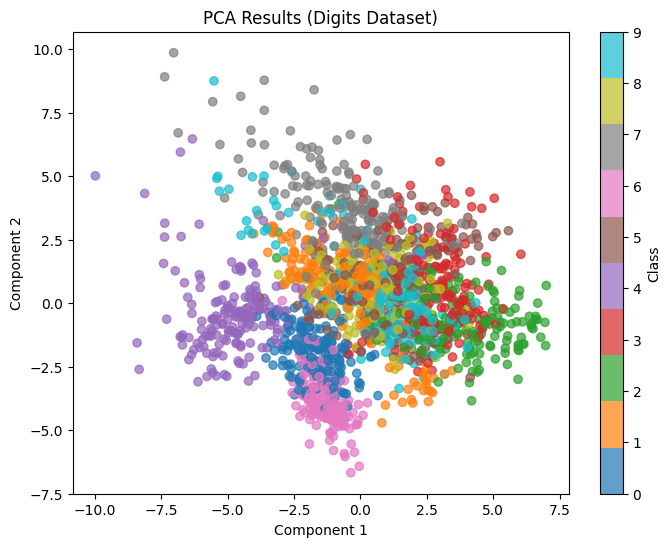

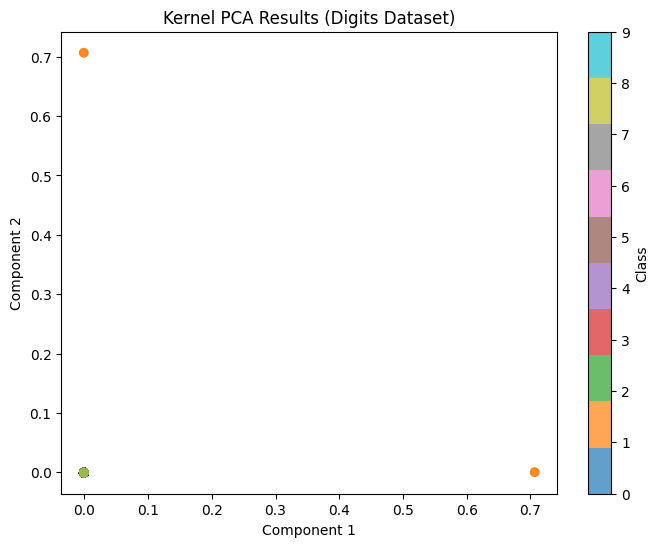

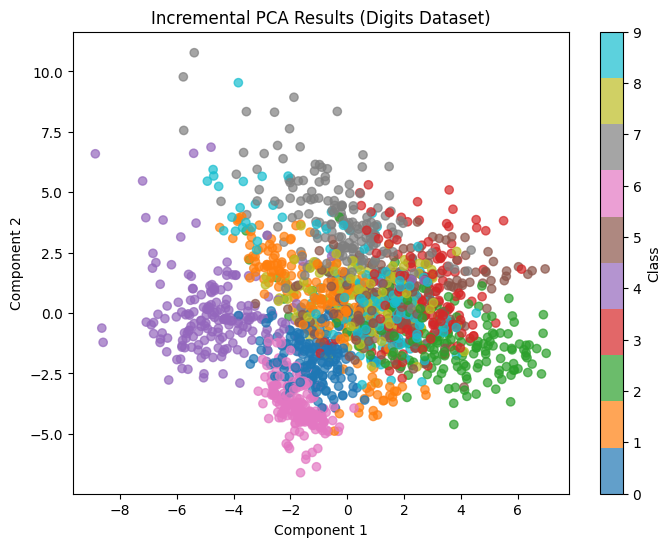

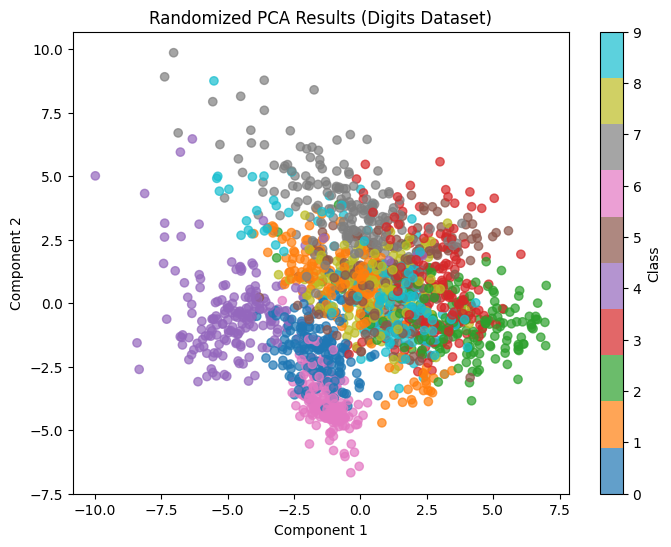

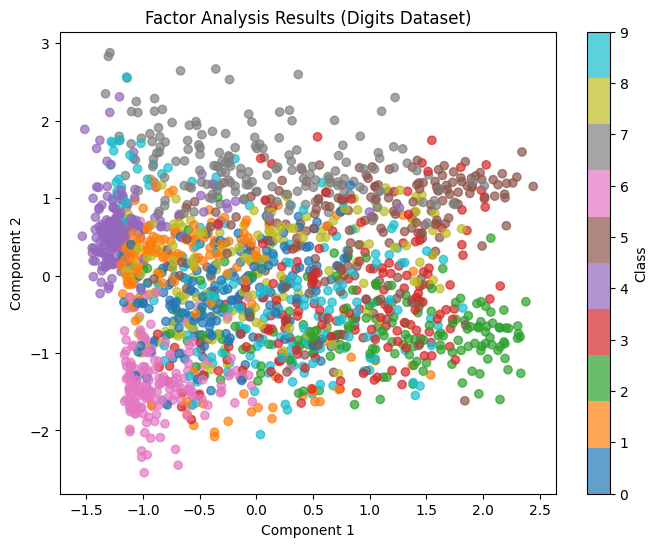

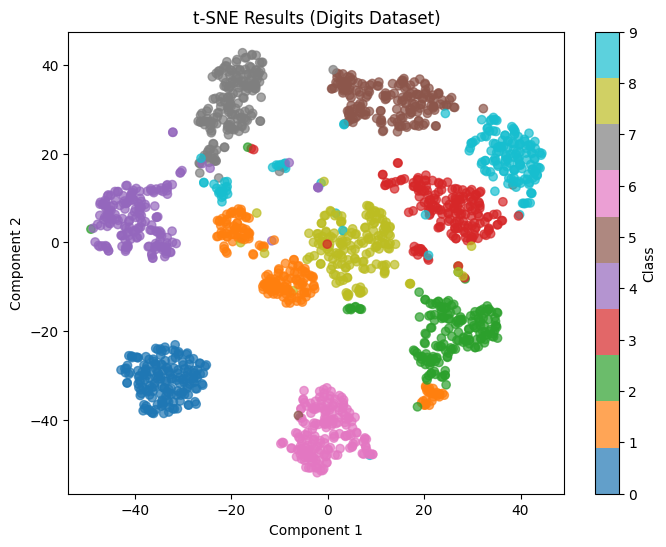

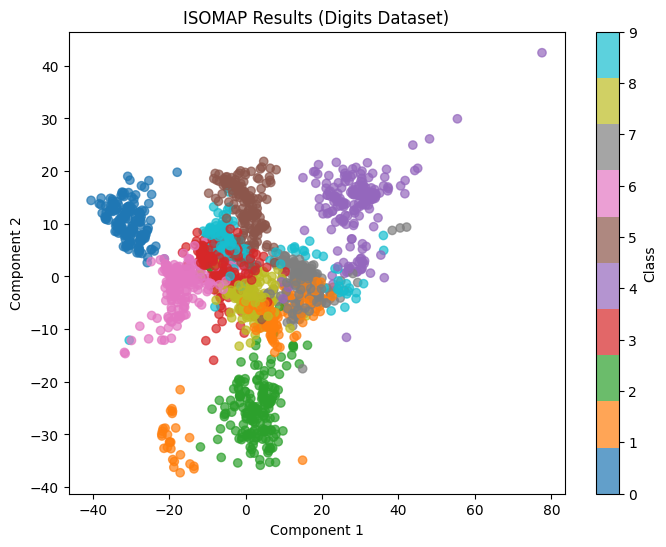

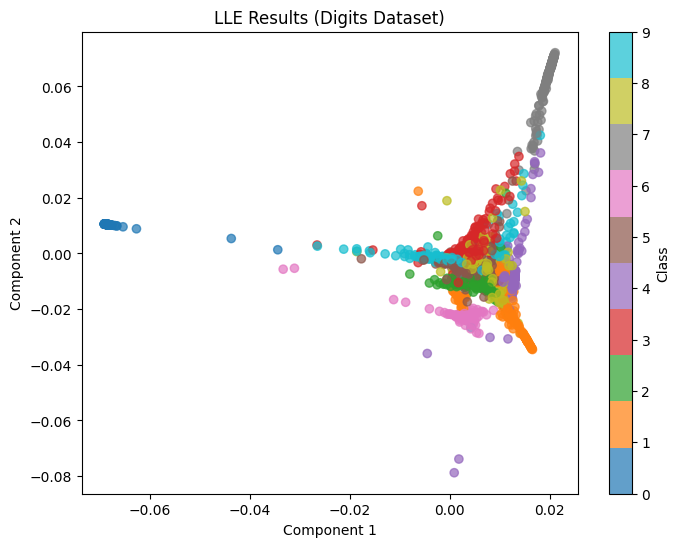

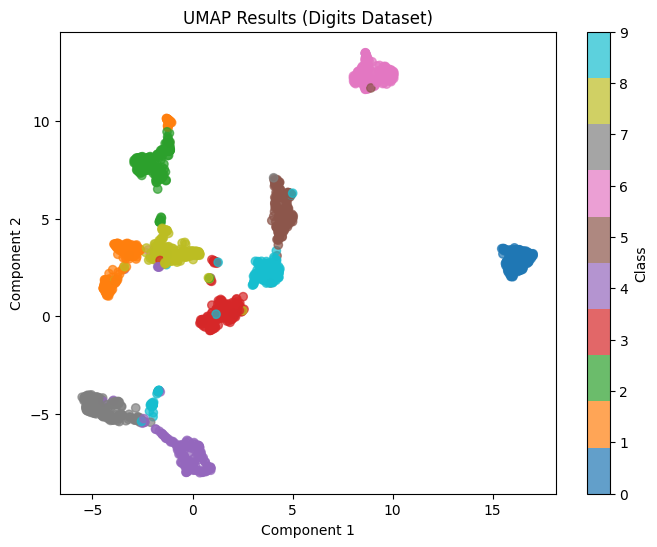

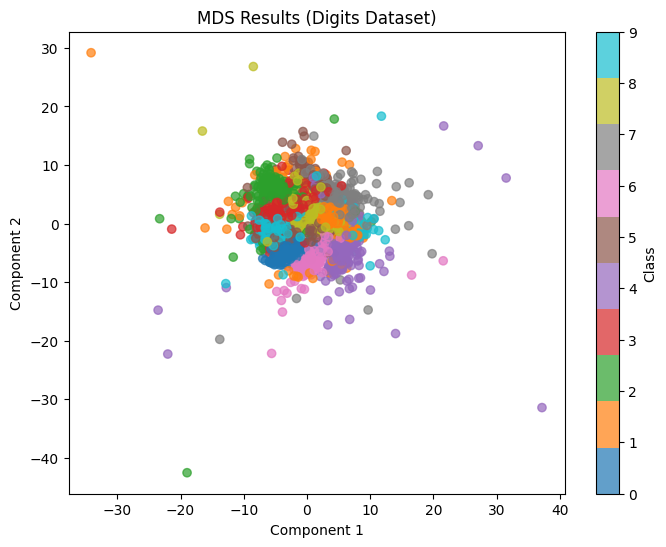

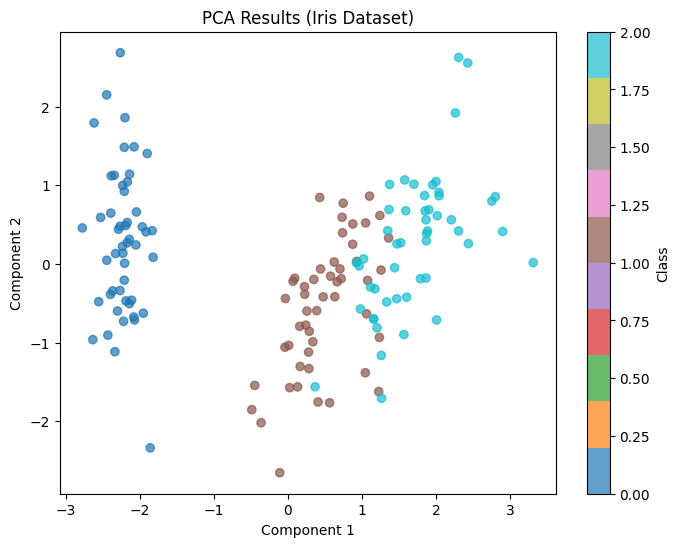

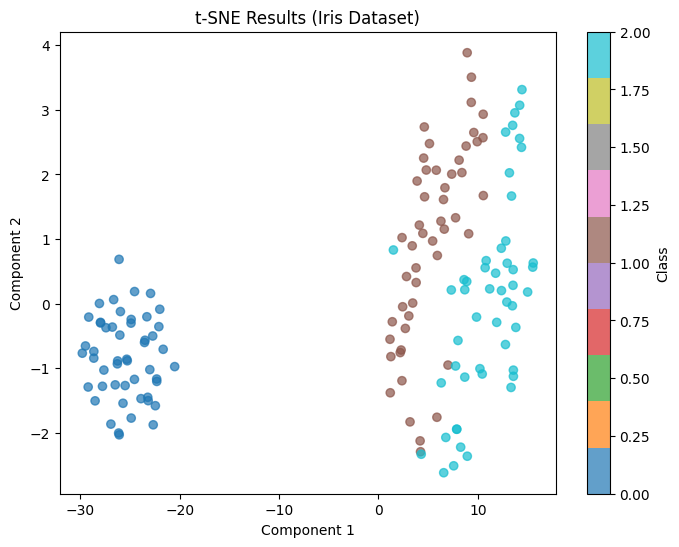

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9461
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9137  
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9077  
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8738  
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7786  
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7655 
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7712 
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7128  
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7307  
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7684 
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6937  
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6645 
Epoch 13/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6598 
Epoch 14/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6673  
Epoch 15/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6528 
Epoch 16/20
8/8 ━━━━━━━━━━━

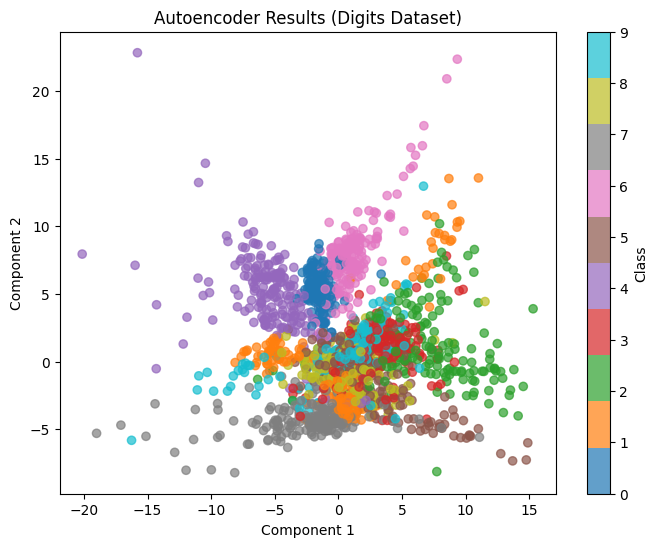

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
from sklearn.decomposition import TruncatedSVD
from umap import UMAP
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input

# Function to visualize results
def plot_results(X, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="tab10", alpha=0.7)
    plt.colorbar(scatter, label="Class")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

# Step 1: Load the Digits Dataset (Image Dataset)
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# Standardize the data
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

# Step 2: Dimensionality Reduction Techniques
results = {}

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_digits_scaled)
results["PCA"] = X_pca

# Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X_digits_scaled)
results["Kernel PCA"] = X_kpca

# Incremental PCA
ipca = IncrementalPCA(n_components=2)
X_ipca = ipca.fit_transform(X_digits_scaled)
results["Incremental PCA"] = X_ipca

# Randomized PCA (Truncated SVD)
rpca = TruncatedSVD(n_components=2)
X_rpca = rpca.fit_transform(X_digits_scaled)
results["Randomized PCA"] = X_rpca

# Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_digits_scaled)
results["Factor Analysis"] = X_fa

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_digits_scaled)
results["t-SNE"] = X_tsne

# ISOMAP
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_digits_scaled)
results["ISOMAP"] = X_isomap

# Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X_digits_scaled)
results["LLE"] = X_lle

# UMAP
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_digits_scaled)
results["UMAP"] = X_umap

# MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_digits_scaled)
results["MDS"] = X_mds

# Step 3: Visualize Results
for method, X in results.items():
    plot_results(X, y_digits, f"{method} Results (Digits Dataset)")

# Step 4: Load the Iris Dataset (Tabular Dataset)
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Standardize the data
X_iris_scaled = scaler.fit_transform(X_iris)

# Step 5: Autoencoder (Digits Dataset)
input_dim = X_digits_scaled.shape[1]
encoding_dim = 2

# Build Autoencoder Model
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation="relu")(input_layer)
encoder = Dense(64, activation="relu")(encoder)
encoder_output = Dense(encoding_dim, activation="linear")(encoder)

decoder = Dense(64, activation="relu")(encoder_output)
decoder = Dense(128, activation="relu")(decoder)
decoder_output = Dense(input_dim, activation="linear")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder_output)
encoder_model = Model(inputs=input_layer, outputs=encoder_output)

# Compile and Train the Autoencoder
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(X_digits_scaled, X_digits_scaled, epochs=20, batch_size=256, shuffle=True, verbose=1)

# Get Encoded Features
X_autoencoded = encoder_model.predict(X_digits_scaled)

# Plot Autoencoder Results
plot_results(X_autoencoded, y_digits, "Autoencoder Results (Digits Dataset)")